# <font color = "#006400"> __Índice__ <a name = "Voltar"></a>
    
1. [Importando os pacotes](#1)    
2. [Importando base de dados](#2)    
3. [Analise exploratoria](#3)    
4. [Previsão base de treino](#4)    
5. [Previsao da base de teste](#5)    
6. [Importando os pacotes](#6)    
7. [Importando os pacotes](#7)    
8. [Importando os pacotes](#8)    
9. [Importando os pacotes](#9)  
    

# <font color = "#006400"> __1 Importante pacotes__ <a name = "1"></a>
    
[Voltar ao indice](#Voltar) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings("ignore")

# <font color = "#006400"> __2 base de dados__ <a name = "2"></a>
    
[Voltar ao indice](#Voltar) 

In [2]:
base = pd.read_csv(r"C:\Users\Usuario\Desktop\Cursos\Ciencias de Dados Hastag\Modulo 30 de 34 Projeto Completo  Aula 1 de 33 Apresentando o projeto desse módulo House Prices do Kaggle\train.csv")

base.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
446,447,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000
817,818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,271000


# <font color = "#006400"> __3 Analise exploratoria__ <a name = "3"></a>
    
[Voltar ao indice](#Voltar) 

In [3]:
print("{:,.21f} Linhas e {} Colunas".format(base.shape[0],base.shape[1]).replace(",","."))
base.info()

1.460.000000000000000000000 Linhas e 81 Colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  Over

In [4]:
base.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
base.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [6]:
np.round((base.isna().sum().sort_values(ascending=False).head(20) / base.shape[0]) * 100, 2)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
Id               0.00
dtype: float64

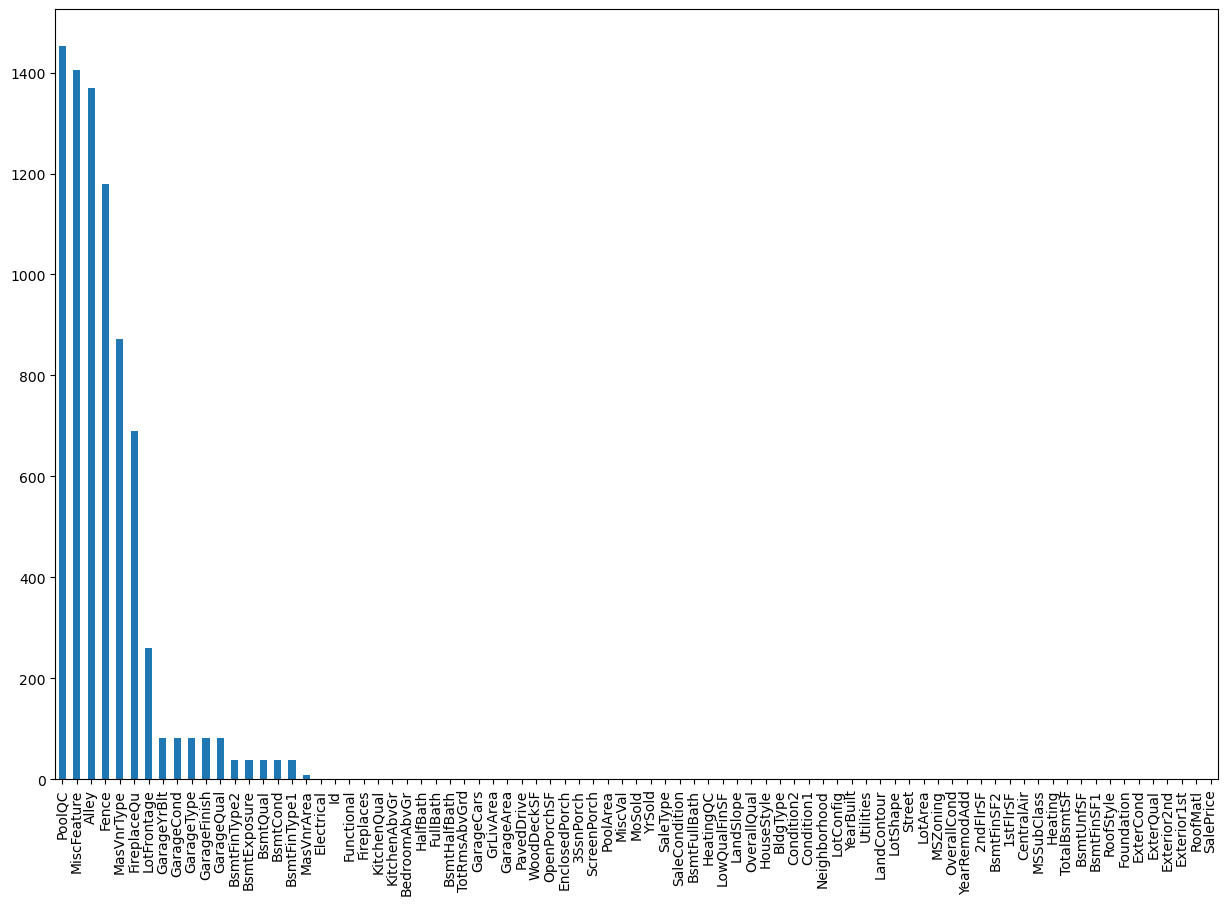

In [7]:
base.isna().sum().sort_values(ascending=False).plot.bar(figsize=(15,10));

In [8]:
numericos = base.select_dtypes(include=(int,float))
categoricos = base.select_dtypes(exclude=(int,float))

In [9]:
a1 = pd.DataFrame(numericos.apply(np.mean )).T
a2 = pd.DataFrame(numericos.apply(np.median )).T
a3 = pd.DataFrame(numericos.apply(np.max )).T
a4 = pd.DataFrame(numericos.apply(np.var )).T
a5 = pd.DataFrame(numericos.apply(np.std )).T
a6 = pd.DataFrame(numericos.apply(np.min )).T
a7 = pd.DataFrame(numericos.apply(lambda x: x.kurtosis )).T
a8 = pd.DataFrame(numericos.apply(lambda x: x.skew )).T

a9 = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8]).T.reset_index()
a9.columns = ["Atributos","Media","Mediana","Maximo","Variavel","Desvio padrão","Minino","Kustosis","Skew"]

a9

,Atributos,Media,Mediana,Maximo,Variavel,Desvio padrão,Minino,Kustosis,Skew
0,Id,730.5,730.5,1460.0,177633.25,421.465598,1.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
1,MSSubClass,56.89726,50.0,190.0,1788.112732,42.286082,20.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
2,LotFrontage,70.049958,NaN,313.0,589.25812,24.274639,21.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
3,LotArea,10516.828082,9478.5,215245.0,99557412.904006,9977.846105,1300.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
4,OverallQual,6.099315,6.0,10.0,1.911369,1.382523,1.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
5,OverallCond,5.575342,5.0,9.0,1.237474,1.112418,1.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
6,YearBuilt,1971.267808,1973.0,2010.0,911.590608,30.192559,1872.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
7,YearRemodAdd,1984.865753,1994.0,2010.0,425.940882,20.638335,1950.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
8,MasVnrArea,103.685262,NaN,1600.0,32762.391987,181.003845,0.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....
9,BsmtFinSF1,443.639726,383.5,5644.0,207882.985271,455.941866,0.0,<bound method NDFrame._add_numeric_operations....,<bound method NDFrame._add_numeric_operations....


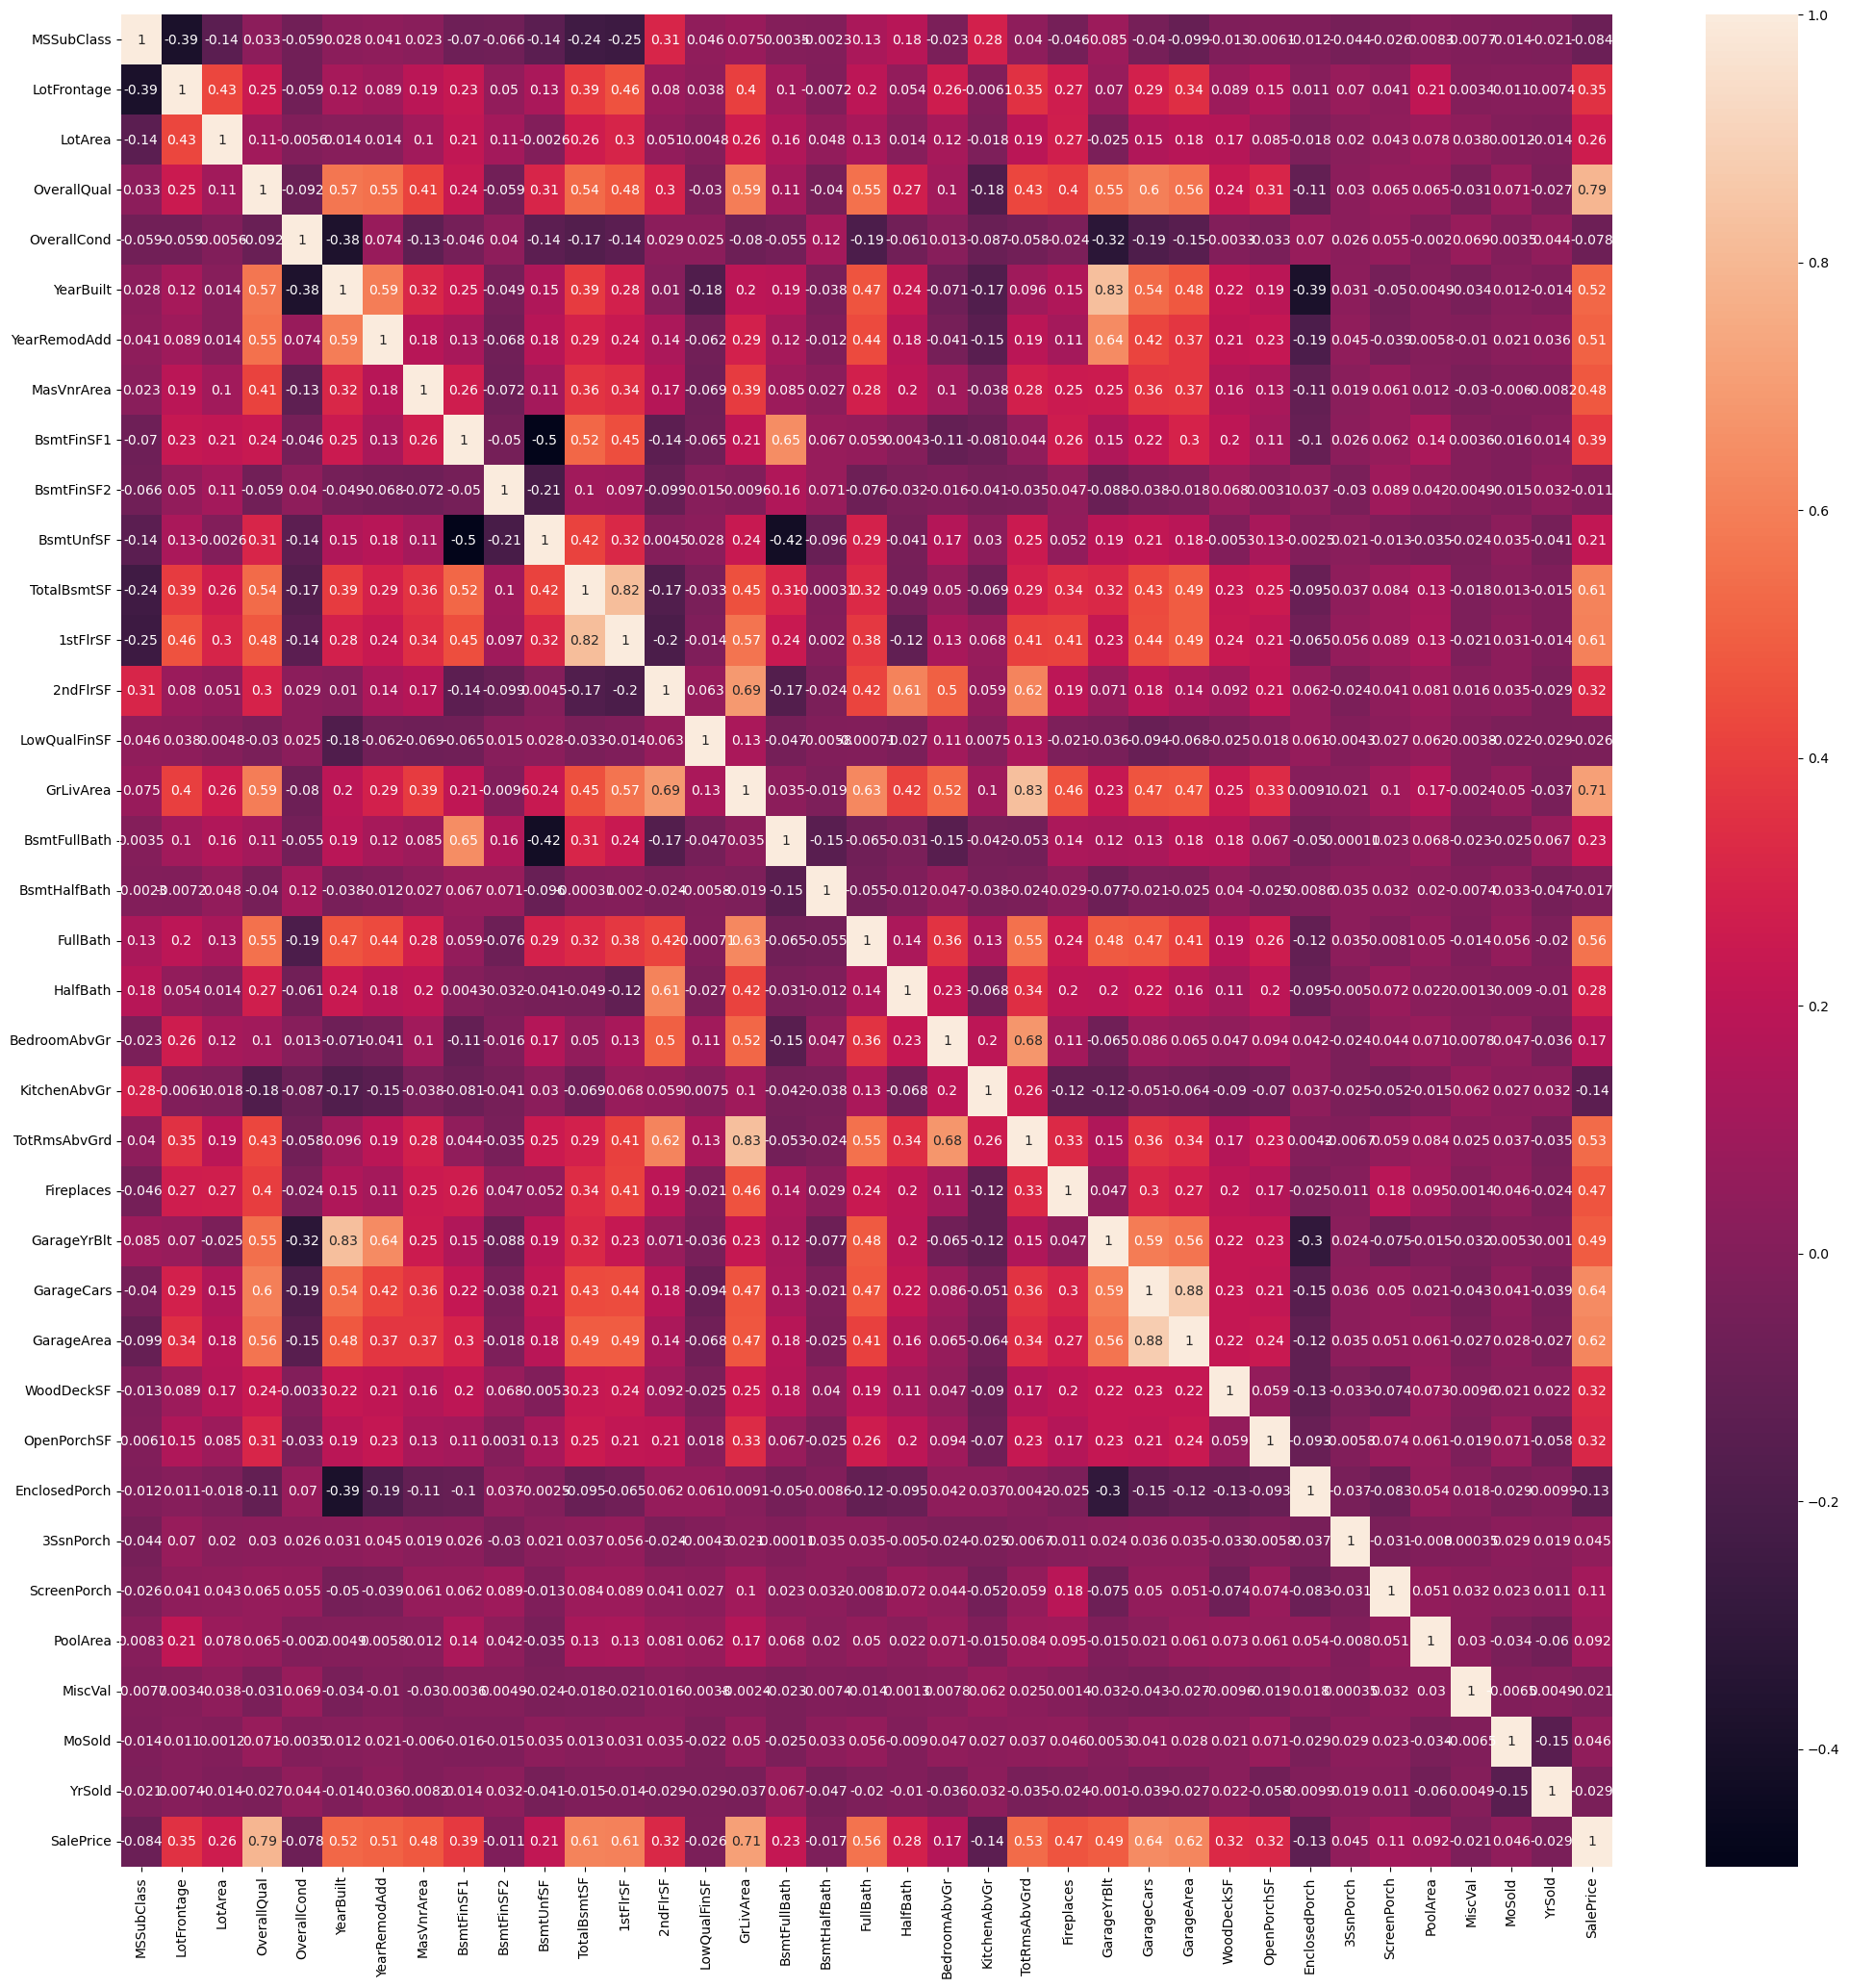

In [10]:
plt.figure(figsize=[25,25])
sns.heatmap(numericos.drop(columns=["Id"]).corr() , annot=True)
plt.show()

# <font color = "#006400"> __Previsão base treino__ <a name = "4"></a>
    
[Voltar ao indice](#Voltar) 

In [11]:
# Trazer de outra forma as colunas numericas
treino = base.loc[:,numericos.columns]

treino.sample(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1043,1044,60,86.0,11839,7,5,1990,1990,99.0,1085,...,192,121,0,0,0,0,0,5,2008,262280
204,205,50,50.0,3500,5,7,1947,1950,0.0,312,...,0,35,0,0,0,0,0,4,2009,110000


In [12]:
treino2 = treino.copy()
treino2 = treino2.dropna()
x = treino2.drop(columns=["SalePrice"], axis=1)

y = treino2["SalePrice"]

In [13]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x,y , test_size=0.30 , random_state=42)

23983.945312603642
0.12942716511132835
1453641251.124235


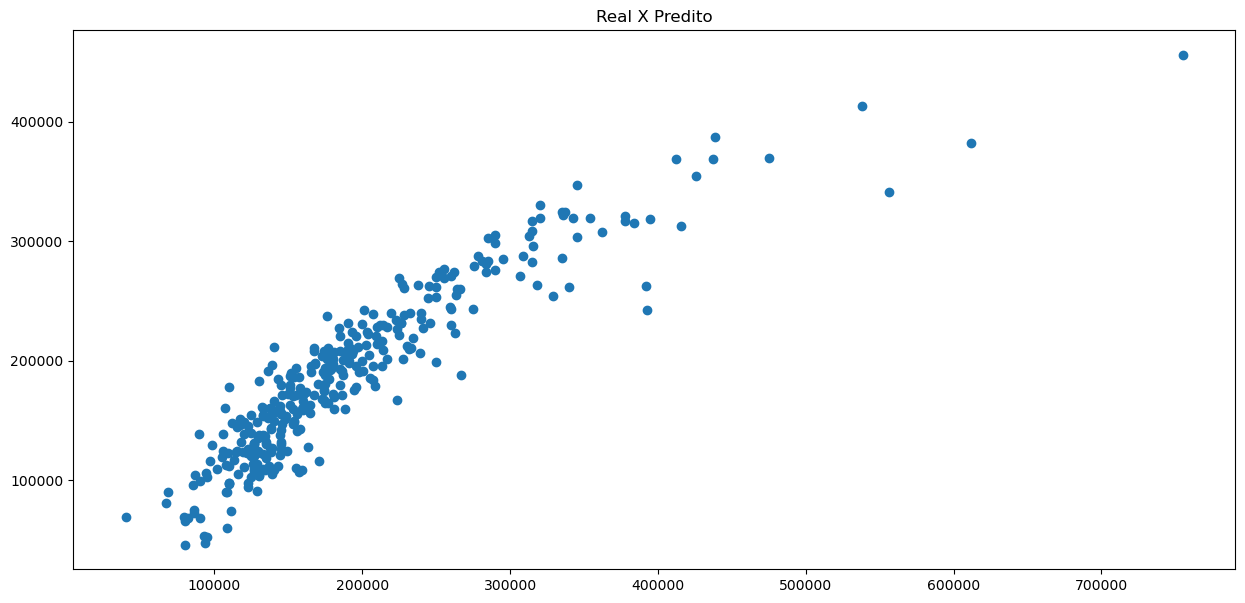

In [14]:
lr = LinearRegression().fit(X_treino , y_treino)

y_pred_lr = lr.predict(X_teste)

print(metrics.mean_absolute_error(y_teste ,y_pred_lr))
print(metrics.mean_absolute_percentage_error(y_teste ,y_pred_lr))
print(metrics.mean_squared_error(y_teste ,y_pred_lr))

plt.figure(figsize=[15,7])
plt.scatter(y_teste , y_pred_lr)
plt.title("Real X Predito")
plt.show()

27980.833827893173
0.15006743819416118
1784531851.4332345


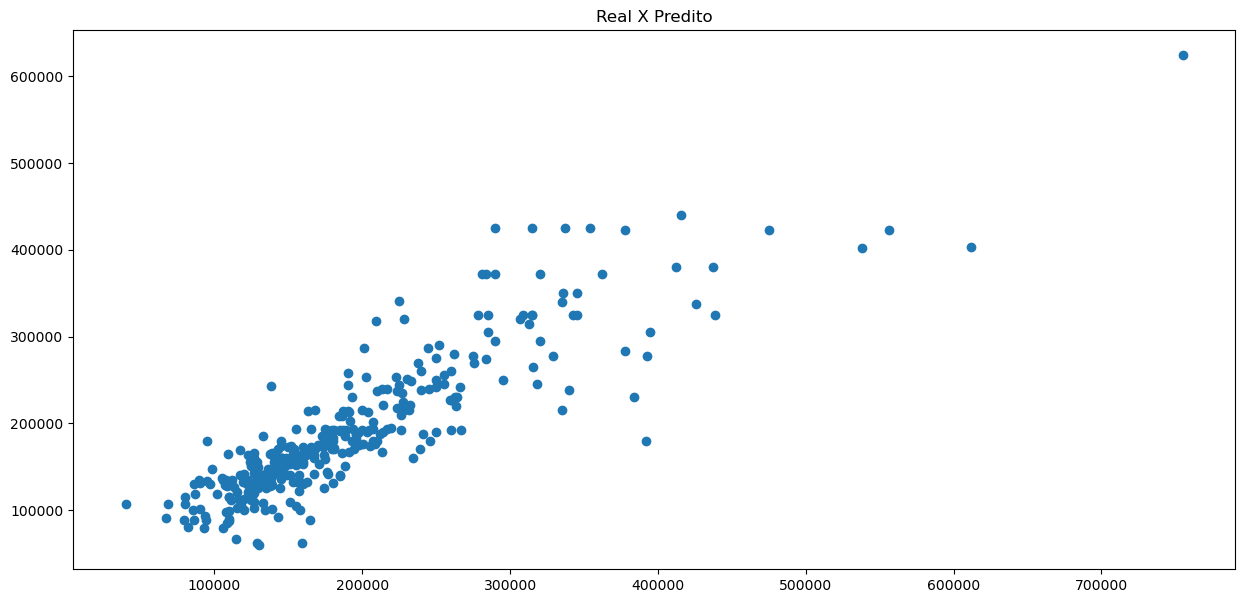

In [15]:
reg_ad  = tree.DecisionTreeRegressor().fit(X_treino , y_treino)

y_pred_reg = reg_ad.predict(X_teste)

print(metrics.mean_absolute_error(y_teste , y_pred_reg))
print(metrics.mean_absolute_percentage_error(y_teste , y_pred_reg))
print(metrics.mean_squared_error(y_teste , y_pred_reg))

plt.figure(figsize=[15,7])
plt.scatter(y_teste , y_pred_reg)
plt.title("Real X Predito")
plt.show()

35271.853115727004
0.1847356469962774
3199822624.4221067


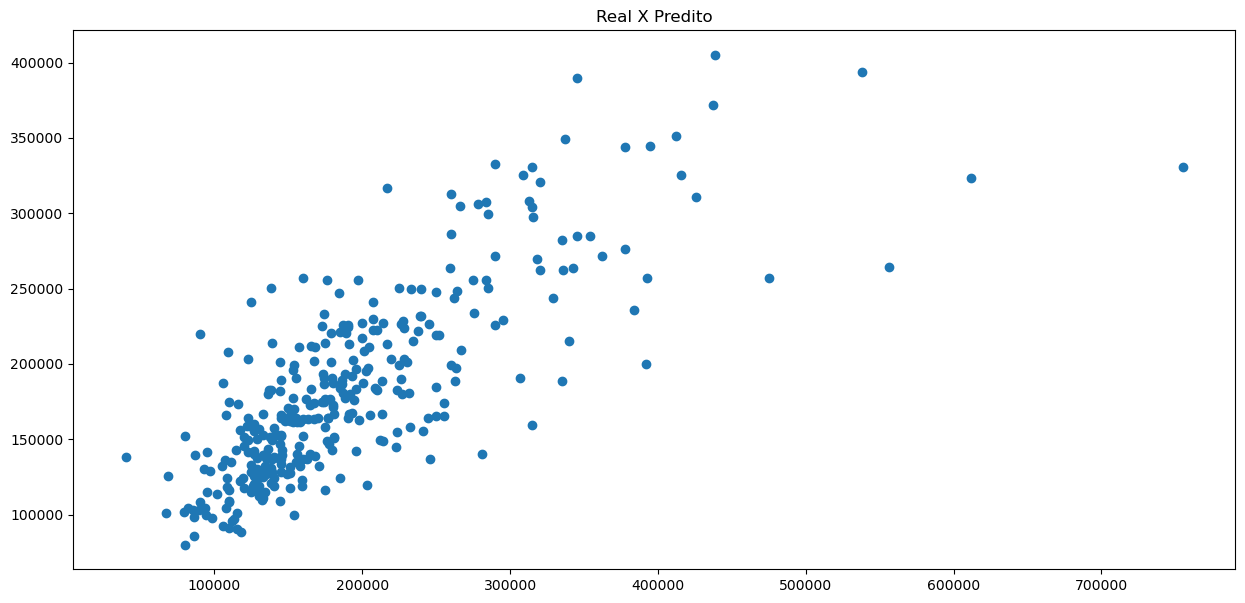

In [16]:
reg_knn  = KNeighborsRegressor(n_neighbors=2).fit(X_treino , y_treino)

y_pred_knn = reg_knn.predict(X_teste)

print(metrics.mean_absolute_error(y_teste , y_pred_knn))
print(metrics.mean_absolute_percentage_error(y_teste , y_pred_knn))
print(metrics.mean_squared_error(y_teste , y_pred_knn))

plt.figure(figsize=[15,7])
plt.scatter(y_teste ,  y_pred_knn)
plt.title("Real X Predito")
plt.show()

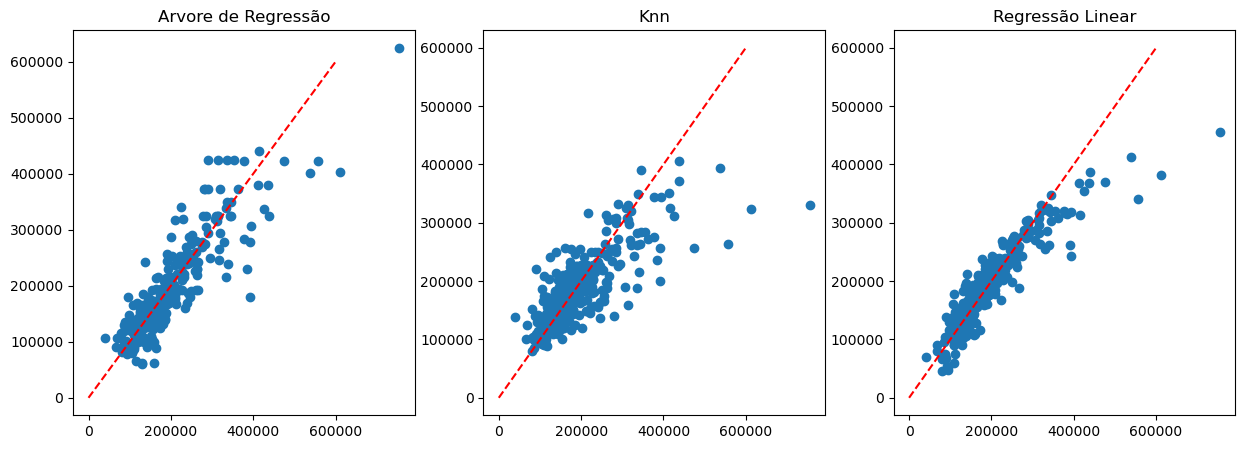

In [17]:
fig, ax = plt.subplots(ncols=3 ,figsize=[15,5])
ax[0].scatter(y_teste ,  y_pred_reg)
ax[0].plot([0,600000],[0,600000] , "--r")
ax[0].set_title("Arvore de Regressão")
ax[1].scatter(y_teste ,  y_pred_knn)
ax[1].plot([0,600000],[0,600000] , "--r")
ax[1].set_title("Knn")
ax[2].scatter(y_teste ,  y_pred_lr)
ax[2].plot([0,600000],[0,600000] , "--r")
ax[2].set_title("Regressão Linear")

plt.show()

# <font color = "#006400"> __5 Previsão base treino__ <a name = "5"></a>
    
[Voltar ao indice](#Voltar) 

In [18]:
teste = pd.read_csv(r"C:\Users\Usuario\Desktop\Cursos\Ciencias de Dados Hastag\Modulo 30 de 34 Projeto Completo  Aula 1 de 33 Apresentando o projeto desse módulo House Prices do Kaggle\test.csv")

teste = teste.loc[:,numericos.drop(columns="SalePrice").columns]

teste = teste.fillna(0)

teste.tail(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006
1458,2919,60,74.0,9627,7,5,1993,1994,94.0,758.0,...,650.0,190,48,0,0,0,0,0,11,2006


In [19]:
y_pred = lr.predict(teste)

y_pred

array([122686.83252913, -20871.29610217, 167887.94597469, ...,
       167423.44120923, 201005.07004664, 252337.2982827 ])

In [20]:
teste["SalePrice"] = y_pred

In [21]:
base_kagle = teste[["Id","SalePrice"]]

base_kagle.to_csv("base_kagle.csv",index=False )

In [22]:
base_kagle.head(5)

,Id,SalePrice
0,1461,122686.832529
1,1462,-20871.296102
2,1463,167887.945975
3,1464,196210.761579
4,1465,194699.658788


# <font color = "#006400"> __5 Previsão base treino__ <a name = "5"></a>
    
[Voltar ao indice](#Voltar) 